In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
import tensorflow as tf
import tensorflow as tf
from tensorflow.keras.layers import Input, Dropout, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.sequence import pad_sequences

import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential

from tensorflow.keras import layers, Model

from tensorflow.keras.models import load_model

In [2]:
data = pd.read_csv('spam.csv', encoding='ISO-8859-1')
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
df = pd.DataFrame(data, columns=['v2','v1'])
df

,v2,v1
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham
...,...,...
5567,This is the 2nd time we have tried 2 contact u...,spam
5568,Will Ì_ b going to esplanade fr home?,ham
5569,"Pity, * was in mood for that. So...any other s...",ham
5570,The guy did some bitching but I acted like i'd...,ham


In [4]:
symbols_list = ['!', '?', '_', '„', 'ک', 'â', '.', '€', '™', '¦', '£ً', '¤', 'ں', '¨', ',', '$', '~', '%', '^', '&', '*', ';', ':', '', '"']

In [5]:
df['text'] = df['v2'].apply(lambda x: re.sub(r'[{}]'.format(''.join(symbols_list)), '', x))
df['text'] = df['text'].apply(lambda x: re.sub(r'http\S+', '', x))
df = df.replace({'v1': {'ham': 0, 'spam': 1, 'NONE':None}})
df = df.dropna()

In [6]:
df

,v2,v1,text
0,"Go until jurong point, crazy.. Available only ...",0,Go until jurong point crazy Available only in ...
1,Ok lar... Joking wif u oni...,0,Ok lar Joking wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,U dun say so early hor... U c already then say...,0,U dun say so early hor U c already then say
4,"Nah I don't think he goes to usf, he lives aro...",0,Nah I don't think he goes to usf he lives arou...
...,...,...,...
5567,This is the 2nd time we have tried 2 contact u...,1,This is the 2nd time we have tried 2 contact u...
5568,Will Ì_ b going to esplanade fr home?,0,Will Ì b going to esplanade fr home
5569,"Pity, * was in mood for that. So...any other s...",0,Pity was in mood for that Soany other suggest...
5570,The guy did some bitching but I acted like i'd...,0,The guy did some bitching but I acted like i'd...


<Axes: xlabel='v1'>

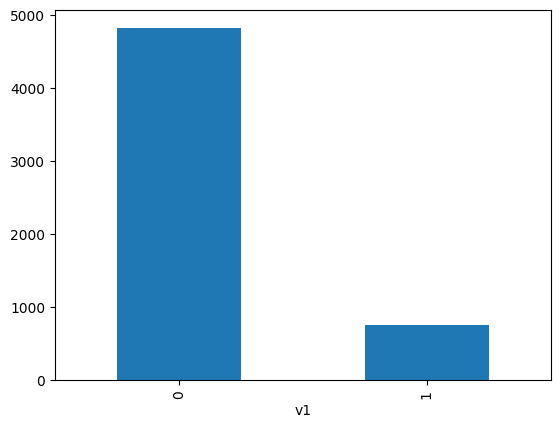

In [7]:
df['v1'].value_counts().plot(kind='bar')

In [8]:
from wordcloud import WordCloud

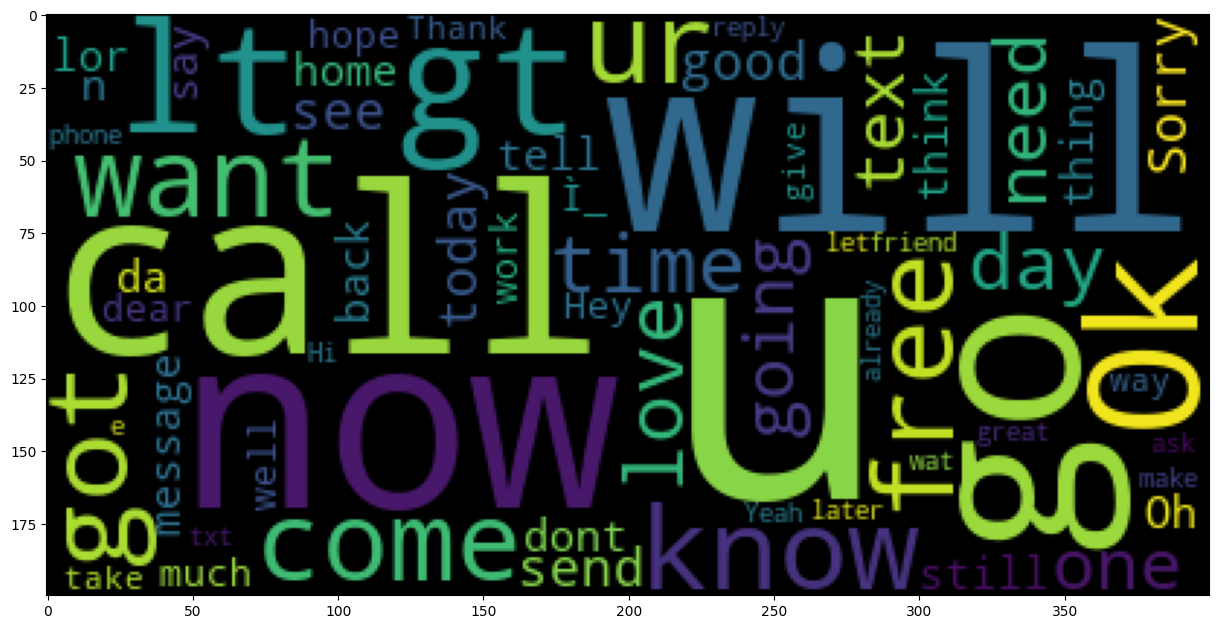

In [9]:
wc = WordCloud(min_font_size=8)
spam_wc = wc.generate(df['v2'].str.cat(sep=" "))
plt.figure(figsize=(15, 8))
plt.imshow(spam_wc)

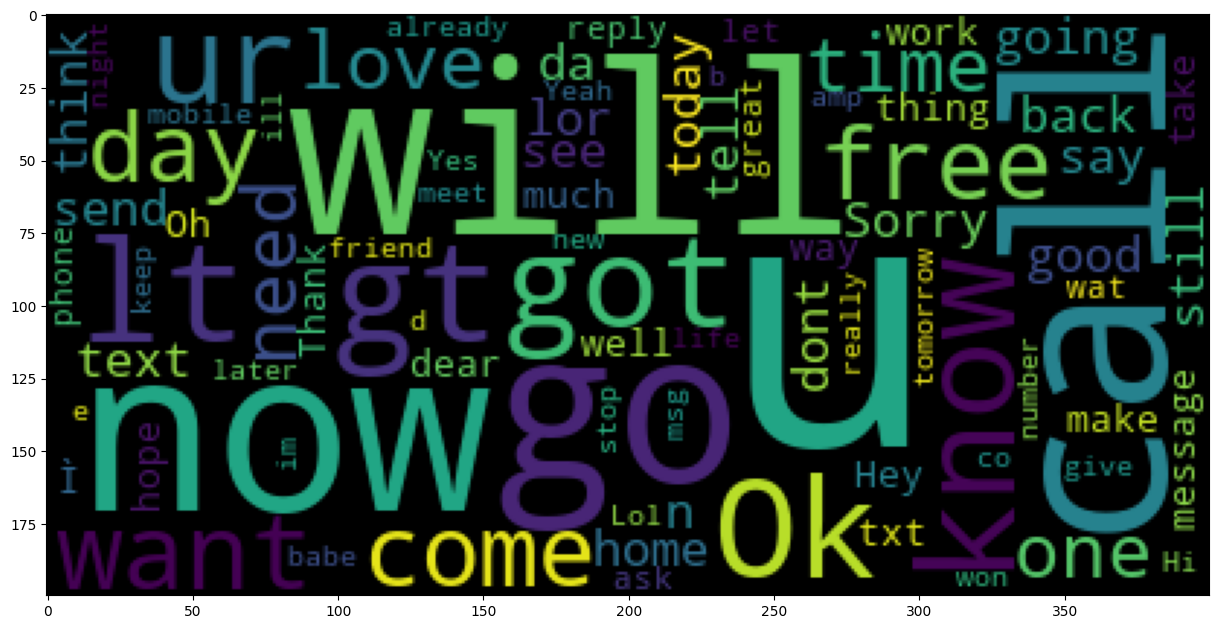

In [10]:
wc = WordCloud(min_font_size=8)
spam_wc = wc.generate(df['text'].str.cat(sep=" "))
plt.figure(figsize=(15, 8))
plt.imshow(spam_wc)

after preprocess

In [11]:
vectorizer = TfidfVectorizer()


X = vectorizer.fit_transform(df['text'])


In [12]:
print(X.toarray())


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [13]:
x = np.array(X.toarray())
y = np.array(df['v1'].tolist())

In [14]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [15]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.25, random_state=1)
X_train.shape

(4179, 9240)

In [17]:
model = tf.keras.Sequential([
    tf.keras.layers.Reshape((9240, 1), input_shape=(9240,)),
    tf.keras.layers.Conv1D(64, kernel_size=1, activation='relu', input_shape=(96,)),
    tf.keras.layers.Conv1D(32, kernel_size=1, activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 9240, 1)           0         
                                                                 
 conv1d (Conv1D)             (None, 9240, 64)          128       
                                                                 
 conv1d_1 (Conv1D)           (None, 9240, 32)          2080      
                                                                 
 flatten (Flatten)           (None, 295680)            0         
                                                                 
 dense (Dense)               (None, 1)                 295681    
                                                                 
Total params: 297,889
Trainable params: 297,889
Non-trainable params: 0
_________________________________________________________________


In [19]:
# model = tf.keras.Sequential([
#     tf.keras.layers.Reshape((9240, 1), input_shape=(9240,)),
#     tf.keras.layers.Conv1D(32, kernel_size=3, activation='relu', padding='same'),
#     tf.keras.layers.LSTM(64, activation='relu', return_sequences=True),
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.LSTM(32, activation='relu'),
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Dense(1, activation='sigmoid')
# ])
#87 acc

Epoch 1/30
33/33 [==============================] - 11s 301ms/step - loss: 0.4249 - accuracy: 0.8533 - val_loss: 0.3675 - val_accuracy: 0.8708
Epoch 2/30
33/33 [==============================] - 10s 296ms/step - loss: 0.3432 - accuracy: 0.8643 - val_loss: 0.3067 - val_accuracy: 0.8708
Epoch 3/30
33/33 [==============================] - 10s 299ms/step - loss: 0.2175 - accuracy: 0.9081 - val_loss: 0.1507 - val_accuracy: 0.9512
Epoch 4/30
33/33 [==============================] - 10s 295ms/step - loss: 0.1043 - accuracy: 0.9727 - val_loss: 0.0883 - val_accuracy: 0.9777
Epoch 5/30
33/33 [==============================] - 10s 296ms/step - loss: 0.0537 - accuracy: 0.9880 - val_loss: 0.0665 - val_accuracy: 0.9813
Epoch 6/30
33/33 [==============================] - 10s 298ms/step - loss: 0.0343 - accuracy: 0.9933 - val_loss: 0.0575 - val_accuracy: 0.9835
Epoch 7/30
33/33 [==============================] - 10s 296ms/step - loss: 0.0235 - accuracy: 0.9952 - val_loss: 0.0523 - val_accuracy: 0.9835

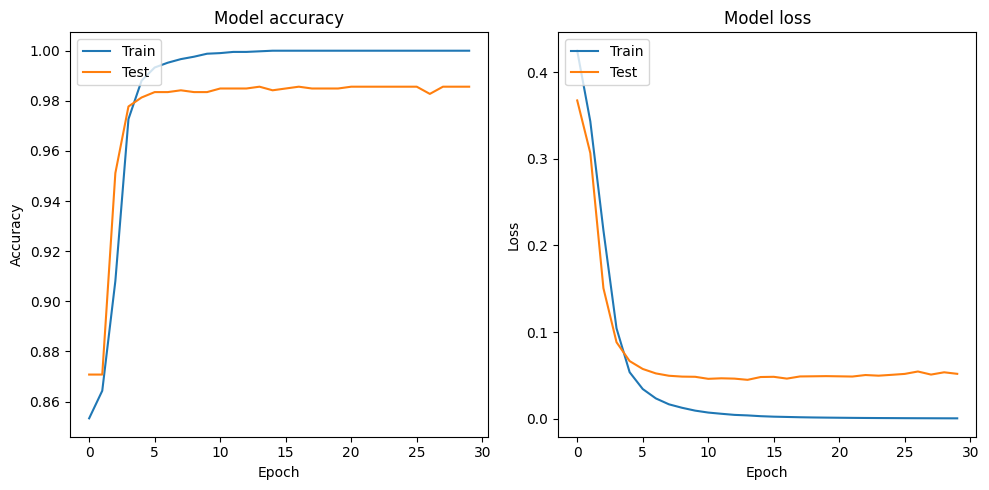

In [20]:
# کامپایل مدل
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# آموزش مدل
# model.fit(X_train, Y_train, epochs=30, batch_size=128)
history = model.fit(X_train, Y_train, epochs=30, batch_size=128, validation_data=(X_test, Y_test))

# Plot training & validation accuracy values


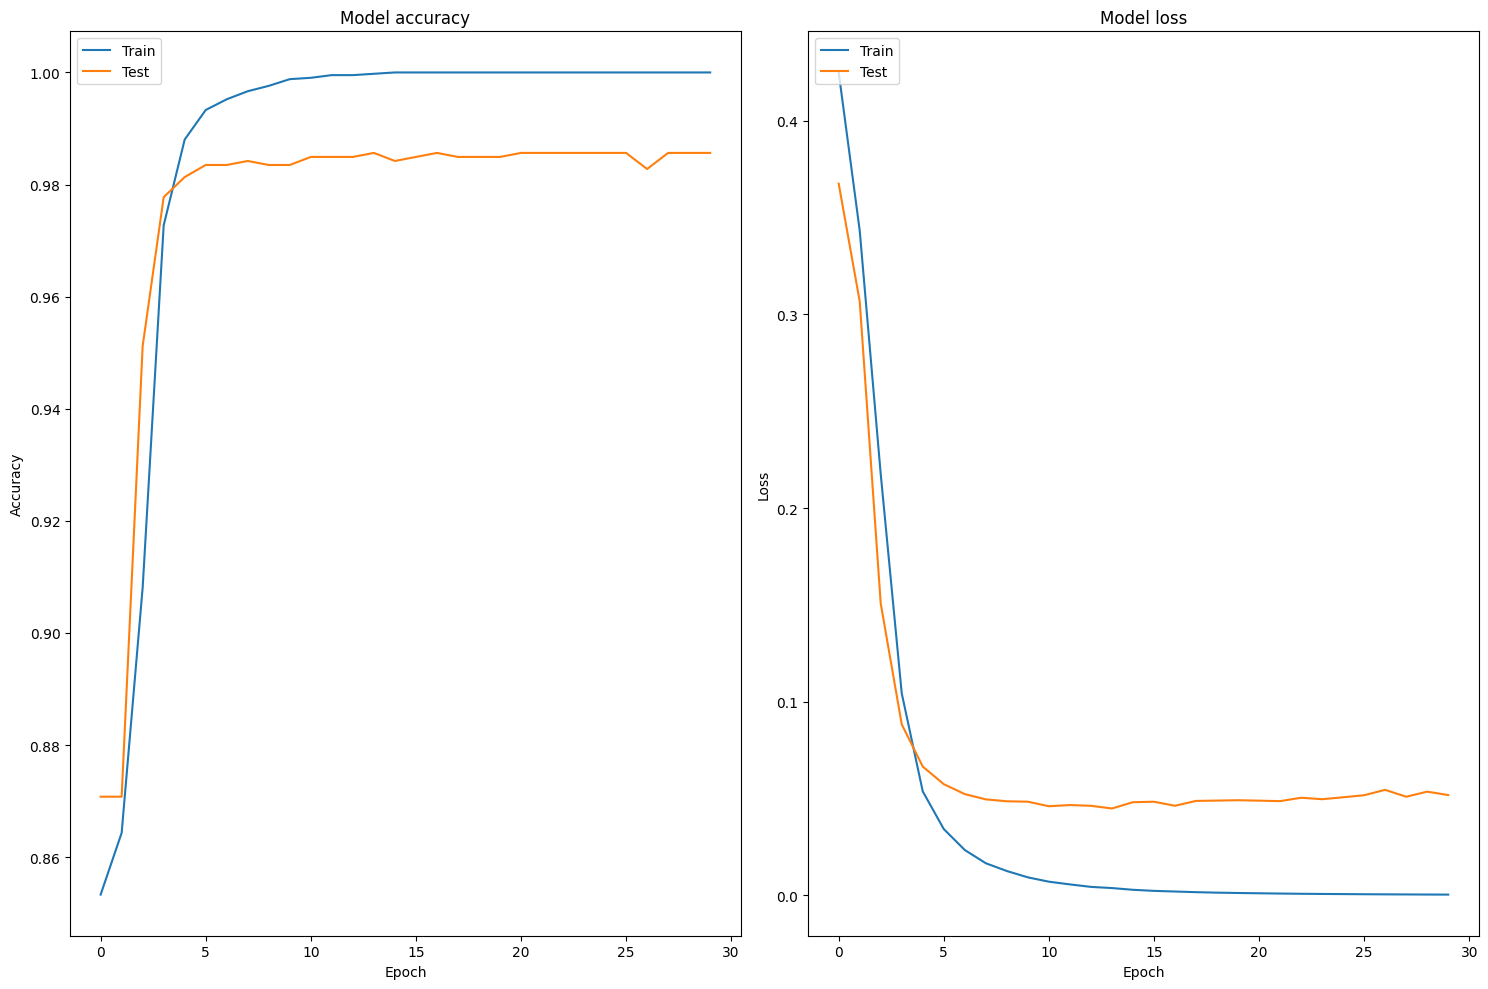

In [30]:
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

In [21]:
Y_pred = model.predict(X_test)
Y_pred_classes = np.round(Y_pred)
confusion_mtx = confusion_matrix(Y_test, Y_pred_classes)

print(confusion_mtx)

44/44 [==============================] - 1s 26ms/step
[[1209    4]
 [  16  164]]


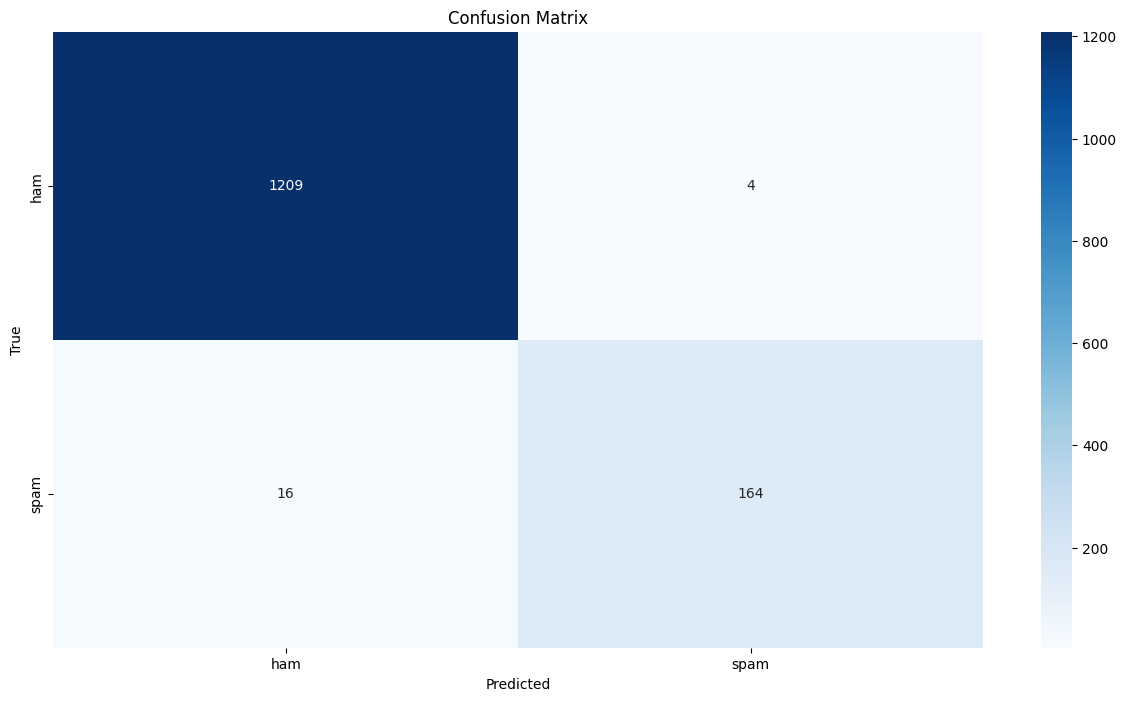

In [29]:
plt.figure(figsize=(15, 8))
sns.heatmap(confusion_mtx, annot=True, fmt="d", cmap="Blues",
            xticklabels=["ham", "spam"],
            yticklabels=["ham", "spam"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [22]:
model.save('mahmood_final_project_model.h5')

In [23]:
model = load_model('mahmood_final_project_model.h5')

In [24]:
model.evaluate(X_test, Y_test)

44/44 [==============================] - 1s 27ms/step - loss: 0.0518 - accuracy: 0.9856


[0.05183136835694313, 0.9856424927711487]